In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [8]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
data = pd.read_csv('pima-indians-diabetes.csv', names=col_names)

In [9]:
data.count() #A pdas handy function to see the count of all the data

pregnant    768
glucose     768
bp          768
skin        768
insulin     768
bmi         768
pedigree    768
age         768
label       768
dtype: int64

In [10]:
data.head() #Most of the times we see the head of the data to see how our
#############data are arranged, or what data typr they are in

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# We have 768 labeled data with either 1 or 0
# Now we split our data into X(feature) and y(result)

In [11]:
label = data["label"]
data.drop('label', axis=1, inplace=True)

X, y = data, label

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9)
print(y_test)

456    0
260    0
651    0
143    1
666    1
390    0
591    0
77     0
414    1
494    0
174    0
474    0
556    0
397    1
446    0
341    0
39     1
588    1
383    0
90     0
128    1
30     0
252    0
65     0
170    1
106    0
283    1
317    1
418    0
257    0
      ..
554    0
4      1
2      1
464    0
271    0
365    0
548    0
267    0
559    0
521    0
702    1
442    0
72     1
112    0
384    0
630    1
200    0
394    1
511    0
527    0
197    1
546    1
481    0
558    0
750    1
661    1
361    0
493    1
601    0
165    1
Name: label, Length: 192, dtype: int64


## Now some simple things if we ever need

In [21]:
y_train.mean()

0.3506944444444444

In [22]:
y_train.count()

576

In [26]:
y_train.value_counts()

0    377
1    199
Name: label, dtype: int64

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn = KNeighborsClassifier(n_neighbors=5)

In [30]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [33]:
y_expected = knn.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix

In [44]:
cm = confusion_matrix(y_expected,y_test)

In [45]:
print(cm)

[[101  36]
 [ 22  33]]


In [47]:
print("Right : " + str( cm[0,0] + cm[1,1]))
print("wrong : " + str( cm[0,1] + cm[1,0]))
print("Accuracy : " + str(  ( cm[0,0] + cm[1,1] ) / y_test.count() ) ) 

Right : 134
wrong : 58
Accuracy : 0.6979166666666666


In [49]:
pd.crosstab(y_test, y_expected, rownames=["True"], colnames= ["Predicted"], margins=True)

Predicted,0,1,All
True,,,
0,101,22,123
1,36,33,69
All,137,55,192


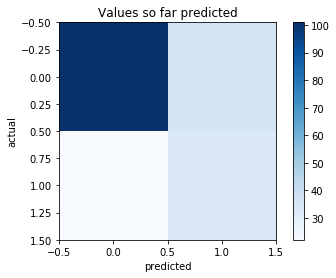

In [51]:
plt.imshow(cm, cmap=plt.cm.Blues, interpolation='nearest')
plt.title("Values so far predicted")
plt.colorbar()
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [52]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))



plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    

plt.title('Classifier (Test set)')
plt.xlabel('no of times pregnant')
plt.ylabel('Plasma Glucose')
plt.legend()
plt.show()

TypeError: unhashable type: 'slice'